# 🌳 Árbol de decisión con el dataset Titanic
Ejercicio sencillo en Python usando `scikit-learn`, `pandas` y `seaborn`. En este cuaderno entrenaremos un modelo para predecir si un pasajero del Titanic sobrevivió.

In [1]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## 📥 Cargar el dataset Titanic

In [ ]:

# Cargar dataset Titanic desde seaborn
titanic = sns.load_dataset("titanic")
print(titanic.shape[0])

# Ver las primeras filas
titanic.head()


891


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🧹 Preparar los datos

In [4]:

# Seleccionamos algunas columnas relevantes
datos = titanic[["survived", "pclass", "sex", "age", "fare"]].dropna()

# Convertimos la variable 'sex' a numérica
datos["sex"] = datos["sex"].map({"male": 0, "female": 1})

# Variables (X) y etiqueta (y)
X = datos[["pclass", "sex", "age", "fare"]]
y = datos["survived"]

# Verificamos que todo esté correcto
datos.head()


,survived,pclass,sex,age,fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


## ✂️ Dividir los datos en entrenamiento y prueba

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## 🌳 Crear y entrenar el modelo

In [6]:

# Creamos el árbol de decisión
modelo = DecisionTreeClassifier(random_state=42, max_depth=4)
modelo.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 📊 Evaluar el modelo

In [7]:

y_pred = modelo.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Precisión del modelo: 0.7767441860465116


## 🌿 Visualizar el árbol de decisión

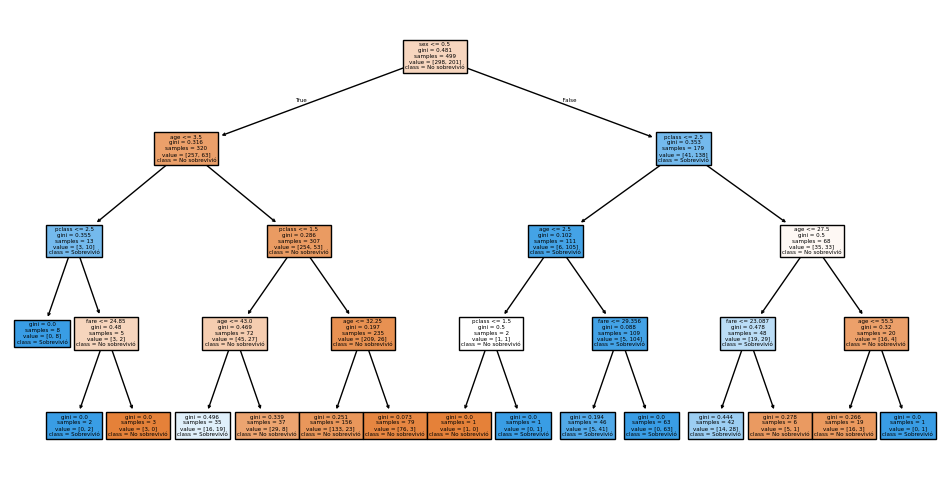

In [8]:

plt.figure(figsize=(12, 6))
plot_tree(
    modelo,
    filled=True,
    feature_names=X.columns,
    class_names=["No sobrevivió", "Sobrevivió"]
)
plt.show()


✅ **Resultado esperado:**
- Precisión entre 0.75 y 0.85 (puede variar ligeramente)
- Visualización del árbol mostrando las decisiones según clase, sexo, edad y tarifa.